In [1]:
!pip install yfinance
!pip install prophet

In [2]:
import yfinance as yf

microsoft = "MSFT"

start = "2018-1-1"
end = "2023-12-31"

data = yf.download(microsoft, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   86.129997   86.309998   85.500000   85.949997   80.080933   
2018-01-03   86.059998   86.510002   85.970001   86.349998   80.453621   
2018-01-04   86.589996   87.660004   86.570000   87.110001   81.161713   
2018-01-05   87.660004   88.410004   87.430000   88.190002   82.167969   
2018-01-08   88.199997   88.580002   87.599998   88.279999   82.251808   
...                ...         ...         ...         ...         ...   
2023-12-22  373.679993  375.179993  372.709991  374.579987  373.888580   
2023-12-26  375.000000  376.940002  373.500000  374.660004  373.968445   
2023-12-27  373.690002  375.059998  372.809998  374.070007  373.379547   
2023-12-28  375.369995  376.459991  374.160004  375.279999  374.587280   
2023-12-29  376.000000  377.160004  373.480011  376.040009  375.345886   

              Volume  
Date                  
2018-01-02  22483800  
2018-01-03  26061400  
2018-01-04  21912000  
2018-01-05  23407100  
2018-01-08  22113000  
...              ...  
2023-12-22  17091100  
2023-12-26  12673100  
2023-12-27  14905400  
2023-12-28  14327000  
2023-12-29  18723000  

[1509 rows x 6 columns]

In [4]:
import pandas as pd
data.reset_index(inplace=True)  # Нулиране на индекса, за да стане 'Date' колона
print(data.columns)
data = data[["Date","Close"]]
data.columns = ["ds","y"]
data

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


ds           y
0    2018-01-02   85.949997
1    2018-01-03   86.349998
2    2018-01-04   87.110001
3    2018-01-05   88.190002
4    2018-01-08   88.279999
...         ...         ...
1504 2023-12-22  374.579987
1505 2023-12-26  374.660004
1506 2023-12-27  374.070007
1507 2023-12-28  375.279999
1508 2023-12-29  376.040009

[1509 rows x 2 columns]

In [5]:
train_data = data[(data['ds'] >= '2018-01-01') & (data['ds'] <= '2022-12-31')]
test_data = data[(data['ds'] >= '2023-01-01') & (data['ds'] <= '2023-12-31')]

In [6]:
import io, os, sys, setuptools, tokenize
from prophet import Prophet
p = Prophet(daily_seasonality=True)
p.fit(train_data)
future = p.make_future_dataframe(periods=365)
data_forecast = p.predict(future)

08:40:53 - cmdstanpy - INFO - Chain [1] start processing
08:40:54 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
data_forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2018-01-02   87.220960   84.003869  104.771815    87.220960    87.220960   
1    2018-01-03   87.266556   83.794269  105.235972    87.266556    87.266556   
2    2018-01-04   87.312152   82.577271  104.461411    87.312152    87.312152   
3    2018-01-05   87.357749   81.757304  103.671168    87.357749    87.357749   
4    2018-01-08   87.494537   80.508780  102.546297    87.494537    87.494537   
...         ...         ...         ...         ...          ...          ...   
1619 2023-12-26  126.555756  100.981386  168.648845    92.486095   155.959123   
1620 2023-12-27  126.301852  100.375683  168.230926    92.114188   155.795863   
1621 2023-12-28  126.047949  100.750012  168.903988    91.766048   155.632602   
1622 2023-12-29  125.794046   98.827269  167.825416    91.417907   155.462313   
1623 2023-12-30  125.540142   97.983191  166.345199    91.067722   155.286420   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0           7.194492              7.194492              7.194492  5.853896   
1           6.964977              6.964977              6.964977  5.853896   
2           6.253967              6.253967              6.253967  5.853896   
3           5.713800              5.713800              5.713800  5.853896   
4           3.733248              3.733248              3.733248  5.853896   
...              ...                   ...                   ...       ...   
1619       10.680656             10.680656             10.680656  5.853896   
1620       10.702385             10.702385             10.702385  5.853896   
1621       10.209830             10.209830             10.209830  5.853896   
1622        9.848848              9.848848              9.848848  5.853896   
1623        8.248671              8.248671              8.248671  5.853896   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     ...  0.094554      0.094554      0.094554  1.246043      1.246043   
1     ...  0.453990      0.453990      0.453990  0.657091      0.657091   
2     ...  0.342624      0.342624      0.342624  0.057447      0.057447   
3     ...  0.405059      0.405059      0.405059 -0.545155     -0.545155   
4     ...  0.167247      0.167247      0.167247 -2.287895     -2.287895   
...   ...       ...           ...           ...       ...           ...   
1619  ...  0.094554      0.094554      0.094554  4.732206      4.732206   
1620  ...  0.453990      0.453990      0.453990  4.394499      4.394499   
1621  ...  0.342624      0.342624      0.342624  4.013311      4.013311   
1622  ...  0.405059      0.405059      0.405059  3.589894      3.589894   
1623  ... -0.731738     -0.731738     -0.731738  3.126514      3.126514   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         1.246043                   0.0                         0.0   
1         0.657091                   0.0                         0.0   
2         0.057447                   0.0                         0.0   
3        -0.545155                   0.0                         0.0   
4        -2.287895                   0.0                         0.0   
...            ...                   ...                         ...   
1619      4.732206                   0.0                         0.0   
1620      4.394499                   0.0                         0.0   
1621      4.013311                   0.0                         0.0   
1622      3.589894                   0.0                         0.0   
1623      3.126514                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   94.415452  
1                            0.0   94.231533  
2                            0.0   93.566119  
3                            0.0   93.071548  
4                            0.0   91.227785  
...                          ...         ...  
1619    

D:\JN\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


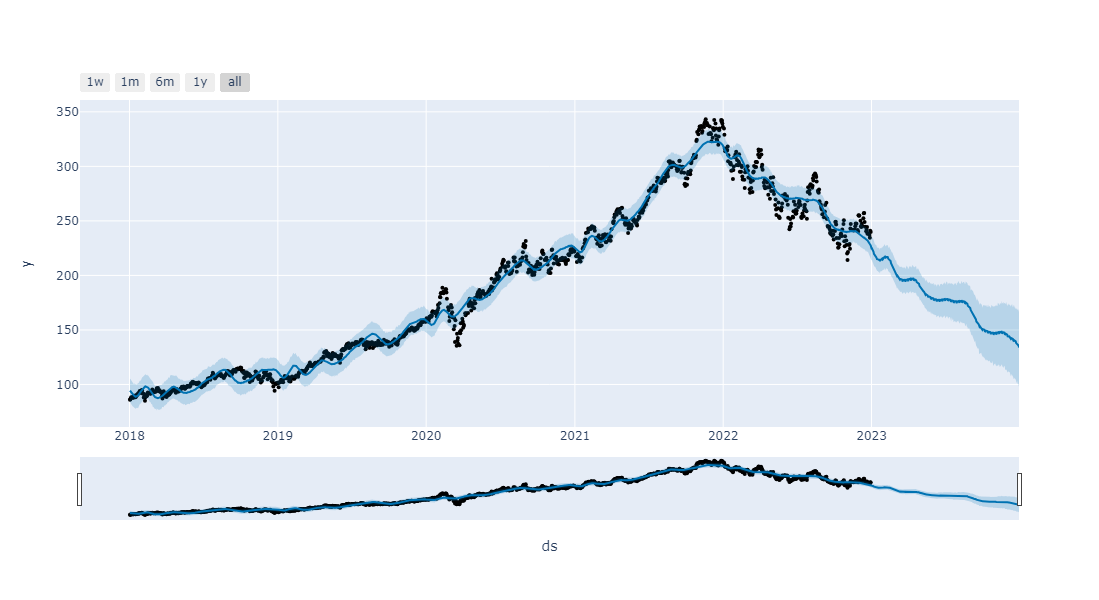

In [8]:
from prophet.plot import plot_plotly
plot_plotly(p, data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future

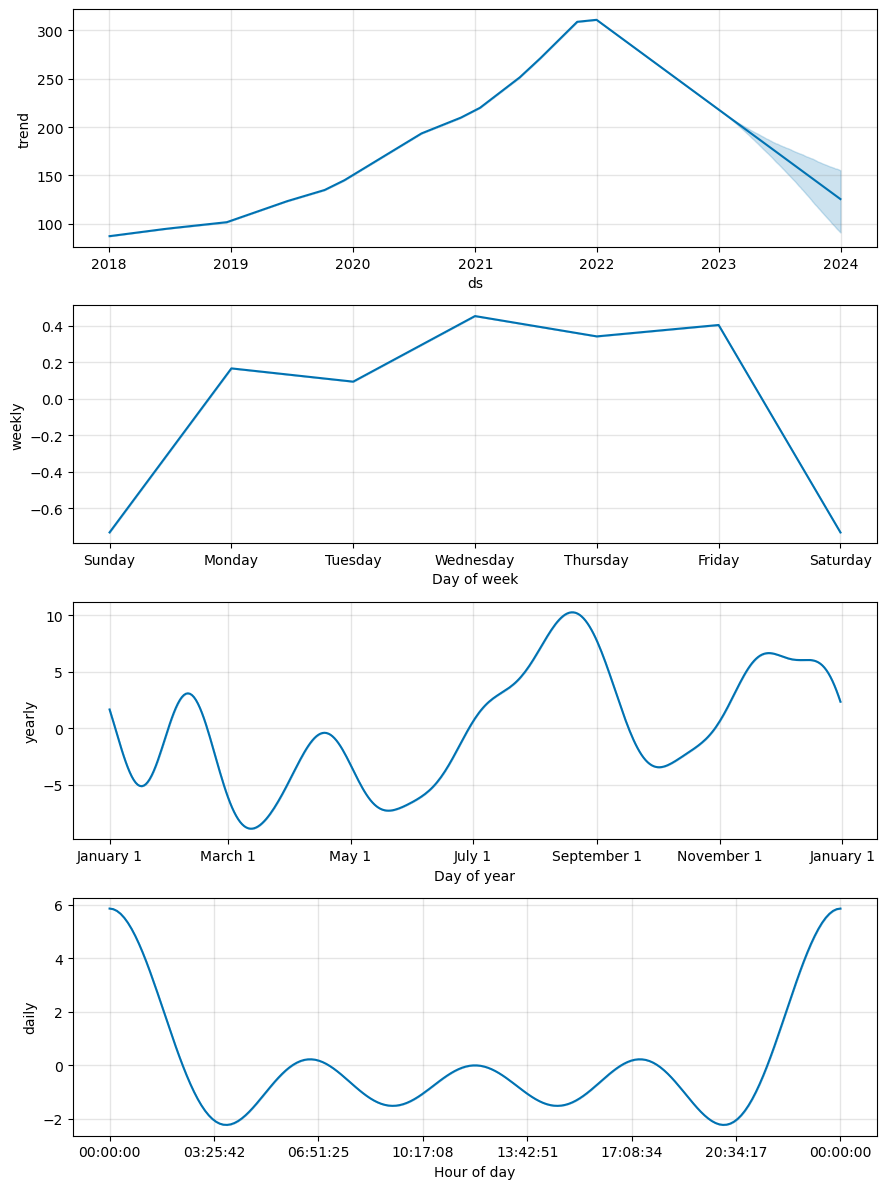

In [9]:
tesla_data_plot = p.plot_components(data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



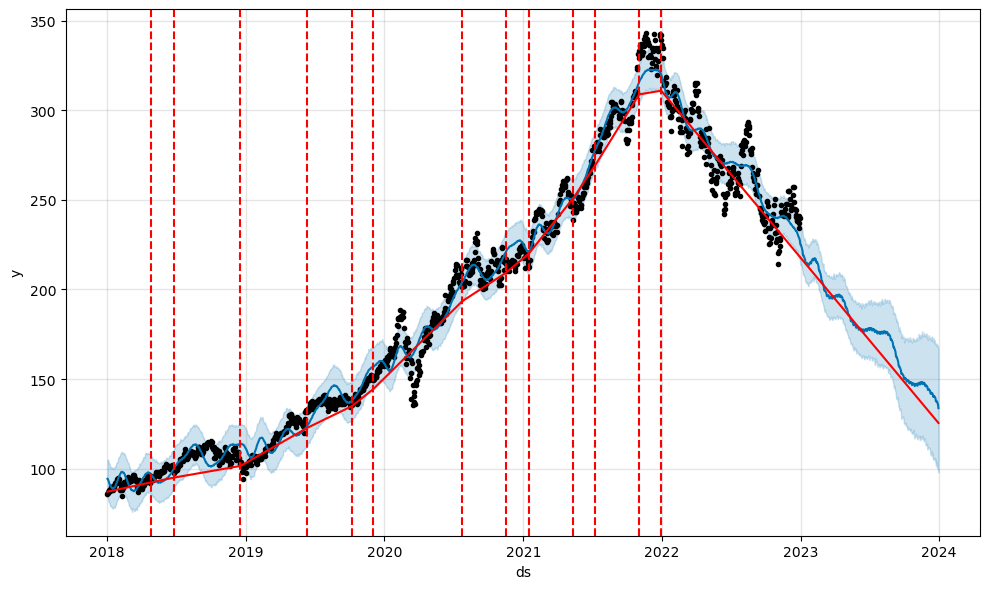

In [10]:
from prophet.plot import add_changepoints_to_plot
fig = p.plot(data_forecast)
a = add_changepoints_to_plot(fig.gca(), p, data_forecast)

<Axes: xlabel='ds'>

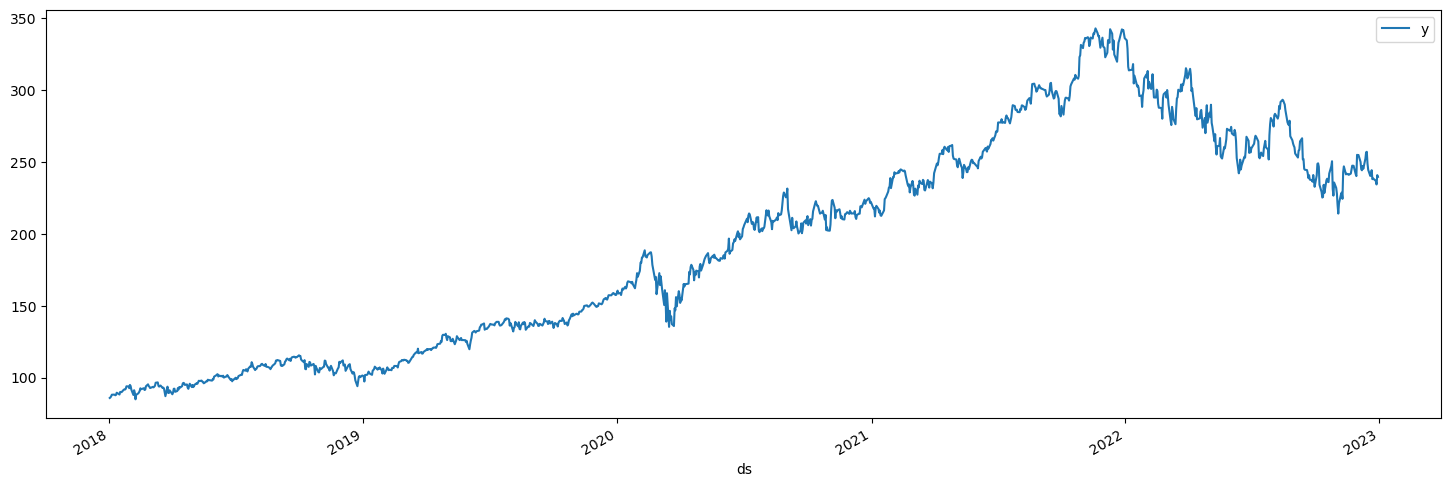

In [11]:
train_data.plot(x='ds',y='y',figsize=(18,6))

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_forecast = data_forecast[(data_forecast['ds'] >= '2023-01-01') & (data_forecast['ds'] <= '2023-12-31')]
test_forecast = test_forecast[test_forecast['ds'].isin(test_data['ds'])]

rmse = mean_squared_error(test_data['y'], test_forecast['yhat'], squared=False)
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
mape = np.mean(np.abs((test_data['y'] - test_forecast['yhat']) / test_data['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 150.4025161167139
MAE: 136.4232898516259
MAPE: 37.4640927134756


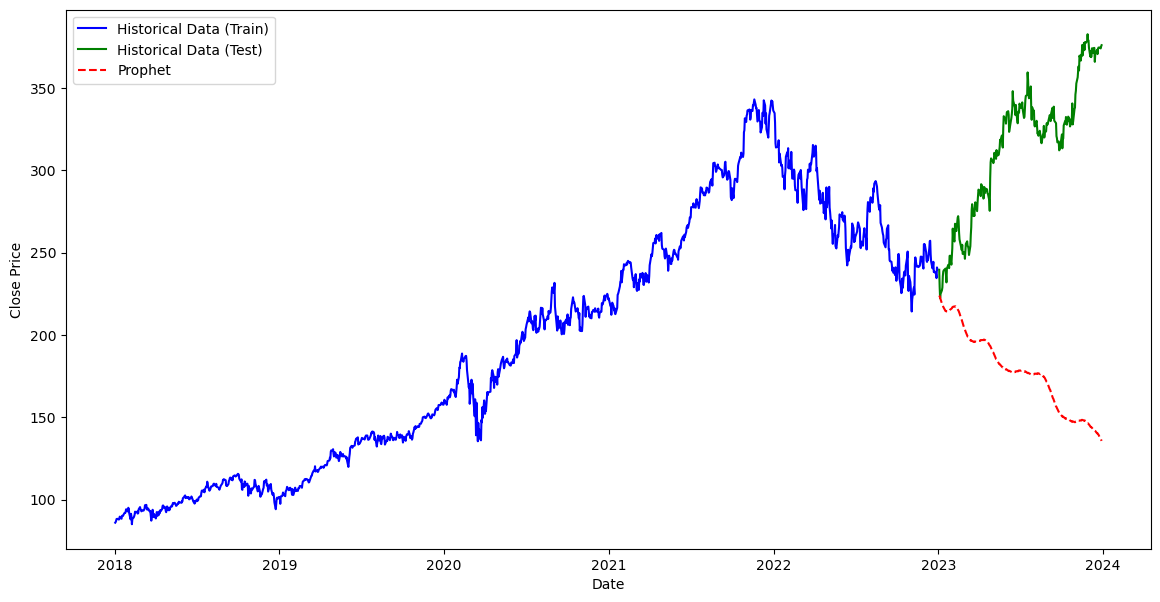

In [13]:
import matplotlib.pyplot as plt

# Визуализация на историческите данни и прогнозата
plt.figure(figsize=(14, 7))
plt.plot(train_data['ds'], train_data['y'], label='Historical Data (Train)', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Historical Data (Test)', color='green')
plt.plot(test_data['ds'], test_forecast['yhat'], label='Prophet', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()